# Simulating Geometric Brownian Motion (GBM) in Python

<b> YouTube Tutorial </b> (Published:
Sep 15, 2021): https://youtu.be/jejjUPfaIXY

In this tutorial we will be simulating Geometric Brownian Motion in Python.

Geometric Brownian motion (GBM) S is defined by S0 > 0 and the dynamics as defined in the following Stochastic Differential Equation (SDE):


$\Large dS_t = \mu S_t dt + \sigma S_t dW_t$

Integrated Form:

 - $\log S_t = \log S_0 + \int_{0}^{t} (\mu-\frac{\sigma^2}{2}) \,ds + \int_{0}^{t} \sigma \,dW_s $

 - $\log S_t = \log S_0 + (\mu-\frac{\sigma^2}{2})t + \sigma W_t $

 - $\log S_t \sim N(\log S_0 + (\mu-\frac{\sigma^2}{2})t, \sigma^2 t)$

Explicit Expression:

$\Large S_t = S_0 {\rm e}^{(\mu-\frac{\sigma^2}{2})t + \sigma W_t}$

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Parameters

In [133]:
# drift coefficent
mu = 0.1
# number of steps
n = 63
# time in years
T = 0.25
# number of sims
M = 10000
# initial stock price
S0 = 100
# volatility
sigma = 0.3

### Simulating GBM Paths

We have two options here, we can either:
- (like here) simulate the stock price directly throughout the simulation and multiple the exponential terms together at each time step; or
- we can simulate the log normal distribution and cumulatively add the terms along each sample path


$\Large S_t = S_0 {\rm e}^{(\mu-\frac{\sigma^2}{2})t + \sigma W_t}$

In [134]:
# calc each time step
dt = T/n

# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
St = np.vstack([np.ones(M), St])

# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)

### Consider time intervals in years

In [139]:
St[-1]

array([ 70.50915131, 111.72663943,  83.67613149, ..., 112.96000559,
       106.32286281,  89.9845483 ])

In [142]:
quintiles

array([1, 4, 1, ..., 4, 4, 2])

In [143]:
quintiles = pd.qcut(St[-1], q=20, labels=False) + 1

# Print results
for value, group in zip(St[-1], quintiles):
    print(f"Value: {value}, Quintile: {group}")

Value: 70.50915131461609, Quintile: 1
Value: 111.7266394253859, Quintile: 16
Value: 83.67613149015972, Quintile: 3
Value: 114.85263354195612, Quintile: 17
Value: 75.4100151779458, Quintile: 1
Value: 89.69172912212201, Quintile: 5
Value: 107.16326236114521, Quintile: 14
Value: 99.08296094525112, Quintile: 9
Value: 118.64892026993769, Quintile: 18
Value: 88.47877567529227, Quintile: 4
Value: 87.8637736001524, Quintile: 4
Value: 108.86129795279254, Quintile: 14
Value: 98.64738932861631, Quintile: 9
Value: 112.54910848493034, Quintile: 16
Value: 105.59463974865024, Quintile: 13
Value: 92.03207711092968, Quintile: 6
Value: 96.48496970986685, Quintile: 8
Value: 103.47155464458369, Quintile: 12
Value: 91.77379432188634, Quintile: 6
Value: 134.87119849817248, Quintile: 20
Value: 104.45407966376838, Quintile: 12
Value: 118.63402829015742, Quintile: 18
Value: 106.43334737995944, Quintile: 13
Value: 125.15126739557272, Quintile: 19
Value: 103.09847155542771, Quintile: 12
Value: 111.087543850005, 

In [136]:
# Define time interval correctly
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

### Plotting Results

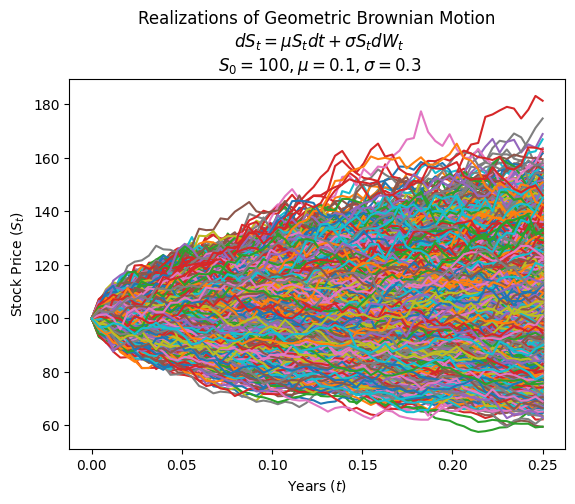

In [137]:
plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Realizations of Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()